## Unemployment Analysis with Python

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate will give us insights which sector or state of the country needs more development. We'll be analyzing unemployment in Indian states during covid-19.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

### Importing & Analyzing Dataset

In [2]:
# creating a dataframe
df = pd.read_csv('Unemployment in India.csv') 

In [3]:
# first 5 rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [5]:
# number of rows and cols
df.shape

(754, 7)

In [6]:
# description of dataset with statistical terms
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## Data Cleaning

In [7]:
# checking null values in dataset
df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
749,False,False,False,False,False,False,False
750,False,False,False,False,False,False,False
751,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False


In [8]:
# checking nulls if any present 
df.isnull().values.any()

True

In [9]:
# calculating the number of null values in columns
df.isnull().sum()

Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64

In [10]:
# total values
df.isnull().sum().sum()

98

In [11]:
# get index number of the rows which have null values & give the output in a list
null_var = df.isnull()
num_null = null_var.index[null_var.any(axis=1)].tolist()
print(num_null)

[359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372]


We can see the null values are in a series from 359 to 372. We will drop these rows.

In [12]:
# printing rows from the index 359 to 372
df.iloc[359:372]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# dropping rows from index 359-372
df = df.drop(index=range(359,373))

In [14]:
# checking number of rows
df.shape

(740, 7)

In [15]:
# checking null values
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

The null values have been removed. Lets check if there are any duplicate rows in dataset.

In [16]:
# check duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.values.any()

False

The output is 'False' so there are no duplicate values.

### Removing Index

In [17]:
# resetting the index as we deleted rows
df = df.reset_index()

In [18]:
# reseting the index to start from 1
df.index = df.index + 1

In [19]:
df.head()

,index,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
1,0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
2,1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
3,2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
4,3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
5,4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
# removing index column
df = df.drop('index', axis = 1)

In [21]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
2,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
3,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
4,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
5,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [22]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
736,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
737,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
738,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
739,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
740,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [23]:
row = df.iloc[350]
print(row)

Region                                      West Bengal
 Date                                        31-10-2019
 Frequency                                      Monthly
 Estimated Unemployment Rate (%)                   6.78
 Estimated Employed                          24353018.0
 Estimated Labour Participation Rate (%)          48.09
Area                                              Rural
Name: 351, dtype: object


### Changing Column Names

In [24]:
# changing the names of the column and removing extra spaces
col_names = df.columns.tolist()
col_names

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

In [25]:
df.set_axis(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area' ], axis=1, inplace=True)
df.head()

C:\Users\FAMILY\AppData\Local\Temp\ipykernel_704\3173927804.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area' ], axis=1, inplace=True)


,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
2,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
3,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
4,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
5,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [26]:
col_names = df.columns.tolist()
col_names

['State',
 'Date',
 'Frequency',
 'Estimated Unemployment Rate (%)',
 'Estimated Employed',
 'Estimated Labour Participation Rate (%)',
 'Area']

The extra spaces have been removed.

### Converting Date column to Datetime

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 1 to 740
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.6+ KB


In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
# lets check the datatype of date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 1 to 740
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [30]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


## Data Wrangling

In [31]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [32]:
df.tail()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
736,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
737,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
738,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
739,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban
740,West Bengal,2020-06-30,Monthly,9.86,9088931.0,37.57,Urban


### State with Highest Unemployment Rate

In [33]:
print(df['State'].value_counts().idxmax())

Andhra Pradesh


### State with Lowest Unemployment Rate

In [34]:
print(df['State'].value_counts().idxmin())

Chandigarh


### Adding Month, Year column

In [35]:
# Adding month
df['Month_Num'] = pd.DatetimeIndex(df['Date']).month

In [36]:
# Adding Month Name
df['Month'] = pd.DatetimeIndex(df['Date']).month_name()

In [37]:
# Adding Year
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [38]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Num,Month,Year
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,2019
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June,2019
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July,2019
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August,2019
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September,2019


In [39]:
df.tail()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Num,Month,Year
736,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,February,2020
737,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,March,2020
738,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,April,2020
739,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May,2020
740,West Bengal,2020-06-30,Monthly,9.86,9088931.0,37.57,Urban,6,June,2020


### Month with Highest Unemployment

In [40]:
df['Month'].value_counts().idxmax()

'May'

### Month with Lowest Unemployment

In [41]:
df['Month'].value_counts().idxmin()

'April'

### Year with Highest Unemployment - 2019 or 2020


In [42]:
df['Year'].value_counts().idxmax()

2019

## Data Visualization

### Top 15 States with High Unemployment Rate

In [55]:
df2 = df[['State','Estimated Unemployment Rate (%)']].groupby('State').sum().sort_values(by='Estimated Unemployment Rate (%)',ascending=False)

In [56]:
df2.head(15)

,Estimated Unemployment Rate (%)
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [72]:
plot = px.bar(df2, x=df2.index, y="Estimated Unemployment Rate (%)", title = 'Top 15 States with Highest Unemployment Rate') 
plot.show()

### Pie Chart for Statewise Unemployment

In [60]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Num,Month,Year
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,2019
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June,2019
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July,2019
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August,2019
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September,2019


In [52]:
df2.columns.tolist()

['Estimated Unemployment Rate (%)']

In [83]:
plot = px.pie(df2, values='Estimated Unemployment Rate (%)', names = df2.index, title='Estimated Unemployment Rate (%)',color_discrete_sequence=px.colors.sequential.RdBu)
plot.show()

### Months with Highest Unemployment

In [46]:
# Sorting the values in descending with highest values on top
df3 = df[["Month","Estimated Unemployment Rate (%)"]].groupby("Month").sum().sort_values(by="Estimated Unemployment Rate (%)", ascending = False)
df3.head(10)

,Estimated Unemployment Rate (%)
Month,
May,1747.85
April,1205.72
June,1097.56
March,556.43
October,544.55
November,542.76
February,528.13
January,527.39
August,510.81


In [71]:
plot = px.bar(df3, x=df3.index, y="Estimated Unemployment Rate (%)", title = 'Months with Highest Unemployment Rate') 
plot.show()

### Estimation of Employment

In [62]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Num,Month,Year
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,2019
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June,2019
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July,2019
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August,2019
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September,2019


### Statewise Estimation of Employment

In [65]:
df4 = df[["State","Estimated Employed"]].groupby("State").sum().sort_values(by="Estimated Employed", ascending = False)
df4.head(10)

,Estimated Employed
State,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


In [75]:
plot = px.bar(df4, x=df4.index, y="Estimated Employed", title = 'Estimated People Employed State Wise') 
plot.show()

### Monthwise Estimation of People Employed

In [74]:
df5 = df[["Month","Estimated Employed"]].groupby("Month").sum().sort_values(by="Estimated Employed", ascending = False)
df5.head(10)

,Estimated Employed
Month,
June,766717078.0
May,699995530.0
January,406899254.0
February,403011803.0
September,402452126.0
October,401411032.0
November,400051335.0
July,399838967.0
August,399610205.0


In [76]:
plot = px.bar(df5, x=df5.index, y="Estimated Employed", title = 'Estimated People Employed Monthly') 
plot.show()

### Estimated Labour Participation Statewise

In [78]:
df6 = df[["State","Estimated Labour Participation Rate (%)"]].groupby("State").sum().sort_values(by="Estimated Labour Participation Rate (%)", ascending = False)
df6.head(10)

,Estimated Labour Participation Rate (%)
State,
Tripura,1731.07
Meghalaya,1541.18
Telangana,1484.07
Gujarat,1290.83
West Bengal,1271.69
Himachal Pradesh,1238.22
Chhattisgarh,1198.70
Haryana,1196.64
Maharashtra,1184.49


In [80]:
plot = px.bar(df6, x=df6.index, y="Estimated Labour Participation Rate (%)", title = 'Estimated Labour Participation Statewise') 
plot.show()

### Estimated Labour Participation Monthly

In [81]:
df7 = df[["Month","Estimated Labour Participation Rate (%)"]].groupby("Month").sum().sort_values(by="Estimated Labour Participation Rate (%)", ascending = False)
df7.head(10)

,Estimated Labour Participation Rate (%)
Month,
June,4389.95
May,4334.10
November,2426.08
October,2420.07
July,2360.16
January,2334.72
February,2317.32
December,2314.37
August,2313.28


In [82]:
plot = px.bar(df7, x=df7.index, y="Estimated Labour Participation Rate (%)", title = 'Estimated Labour Participation Monthly') 
plot.show()

### Yearwise Unemployment Analysis

In [93]:
df8 = df[["Year","Month","Estimated Unemployment Rate (%)"]].groupby(["Year","Month"]).sum()#.sort_values(by="Estimated Unemployment Rate (%)", ascending = False)
df8.head(20)

Estimated Unemployment Rate (%)
Year Month                                     
2019 August                              510.81
     December                            503.36
     July                                487.83
     June                                502.38
     May                                 479.21
     November                            542.76
     October                             544.55
     September                           470.69
2020 April                              1205.72
     February                            528.13
     January                             527.39
     June                                595.18
     March                               556.43
     May                                1268.64

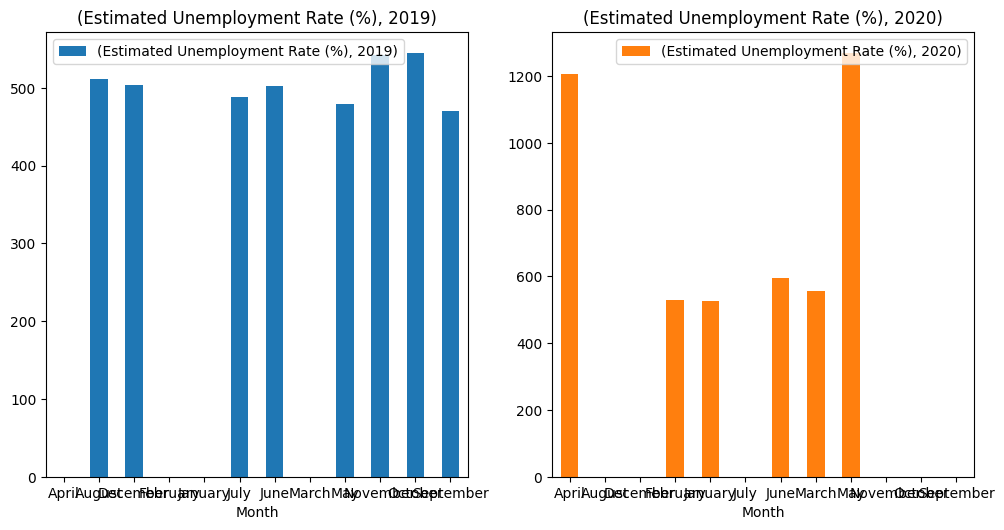

In [104]:
#plot = px.bar(df8, x = df8.index('Month'), y="Estimated Unemployment Rate (%)", title = 'Highest Unemployment Rate Yearly') 
#plot.show()
plot = df8.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()